In [299]:
import numpy as np
import pandas as pd

In [300]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [301]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

## Basic Preprocessing

In [302]:
df = pd.read_csv('spam.csv',encoding="latin-1")

In [303]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'actual_target','v2':'text'})

df['target'] = df['actual_target'].map({'ham':0,'spam':1})

In [304]:
df

,actual_target,text,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [305]:
np.round(df['target'].value_counts()/df.shape[0],2)

target
0    0.87
1    0.13
Name: count, dtype: float64

## EDA

In [306]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [307]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [308]:
ham = df[df['target'] == 0]['text']
spam = df[df['target'] == 1]['text']

In [309]:
def top10_ngrams(input_text, ngram_range):
    vectorizer = CountVectorizer(stop_words = 'english', ngram_range = ngram_range)
    bow = vectorizer.fit_transform(input_text)

    counts = np.asarray(bow.sum(axis=0)).flatten()
    features = vectorizer.get_feature_names_out()

    top10_ind = counts.argsort()[-10:][::-1]
    # top_ngrams = [(features[i], counts[i]) for i in top_index]
    top10_ngrams = pd.DataFrame({
        'feature': [features[i] for i in top10_ind],
        'count': [counts[i] for i in top10_ind]
    })

    return top10_ngrams

In [310]:
ham_unigrams = top10_ngrams(ham, (1, 1))
spam_unigrams = top10_ngrams(spam, (1, 1))
print(ham_unigrams)
print(spam_unigrams)

  feature  count
0      gt    318
1      lt    316
2    just    293
3      ok    287
4      ll    265
5      ur    241
6    know    236
7    good    233
8     got    232
9    like    232
  feature  count
0    free    224
1     txt    163
2      ur    144
3  mobile    127
4    text    125
5    stop    121
6   claim    113
7   reply    104
8     www     98
9   prize     93


In [311]:
ham_bigrams = top10_ngrams(ham, (2,2))
spam_bigrams = top10_ngrams(spam, (2,2))
print(ham_bigrams)
print(spam_bigrams)

        feature  count
0         lt gt    276
1      ll later     42
2      let know     40
3      sorry ll     39
4  good morning     32
5      don know     24
6    decimal gt     23
7      new year     23
8    lt decimal     23
9        ok lor     22
            feature  count
0            po box     24
1         1000 cash     23
2  prize guaranteed     22
3         send stop     20
4     national rate     20
5  selected receive     19
6  await collection     19
7     urgent mobile     18
8         land line     18
9        chance win     17


In [312]:
ham_trigrams = top10_ngrams(ham, (3,3))
spam_trigrams = top10_ngrams(spam, (3,3))
print(ham_trigrams)
print(spam_trigrams)

            feature  count
0    sorry ll later     38
1     lt decimal gt     23
2    happy new year     18
3          gt lt gt     15
4        like lt gt     14
5          lt gt lt     13
6  pls send message     13
7    right pls send     12
8   phone right pls     12
9  pick phone right     12
                  feature  count
0     suite342 2lands row     15
1          draw shows won     15
2         land line claim     14
3    private 2003 account     13
4  2003 account statement     13
5    guaranteed 1000 cash     12
6     800 redeemed points     12
7      shows 800 redeemed     12
8      hg suite342 2lands     11
9        bt national rate     11


In [313]:
ham_words = ' '.join(ham)
spam_words = ' '.join(spam)

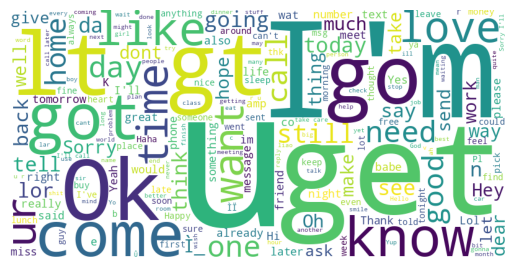

In [314]:
ham_wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=STOPWORDS).generate(ham_words)

# plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show()

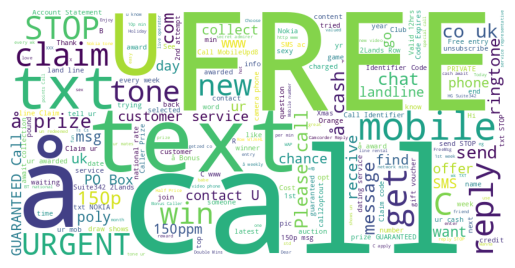

In [315]:
spam_wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=STOPWORDS).generate(spam_words)

# plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

## Bag-of-words (BoW)

In [316]:
vectorizer = CountVectorizer(stop_words = 'english')
bow = vectorizer.fit_transform(df['text'])

In [317]:
bow_df = pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [318]:
X_train, X_test, y_train, y_test = train_test_split(bow, df['target'], test_size=0.2, random_state=27, stratify=df['target'])

In [319]:
rfc = RandomForestClassifier(n_estimators=100, random_state=27)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
f1_bow = f1_score(y_test, y_pred, pos_label=1)
print(f"F1-score with Bag-of-Words: {f1_bow}")

F1-score with Bag-of-Words: 0.8847583643122676


## Implementing TF-IDF

In [320]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
text_tfidf = tfidf_vectorizer.fit_transform(df['text'])

In [321]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(text_tfidf, df['target'],
                                                                            test_size=0.2, random_state=27, stratify=df['target'])

In [322]:
rfc.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = rfc.predict(X_test_tfidf)

f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf, pos_label=1)
print(f"F1-score with TF-IDF: {f1_tfidf}")

F1-score with TF-IDF: 0.8921933085501859


## Text Preprocessing

In [323]:
# import re
# from nltk.tokenize import word_tokenize
# import nltk

# # Download necessary NLTK data
# nltk.download('punkt')

# def tokenize(text):
#     return word_tokenize(text)

# def to_lower_case(tokens):
#     return [token.lower() for token in tokens]

# from nltk.corpus import stopwords

# # Download necessary NLTK data
# nltk.download('stopwords')

# def remove_stop_words(tokens):
#     stop_words = set(stopwords.words('english'))
#     return [token for token in tokens if token not in stop_words]

# def remove_unwanted_elements(text):
#     # Remove email addresses
#     text = re.sub(r'\S+@\S+', '', text)
#     # Remove URLs
#     text = re.sub(r'http\S+', '', text)
#     # Remove HTML tags
#     text = re.sub(r'<.*?>', '', text)
#     return text

# def remove_numbers(text):
#     return re.sub(r'\d+', '', text)

# from nltk.stem import WordNetLemmatizer

# # Download necessary NLTK data
# nltk.download('wordnet')

# def lemmatize_tokens(tokens):
#     lemmatizer = WordNetLemmatizer()
#     return [lemmatizer.lemmatize(token) for token in tokens]


In [324]:
df["cleaned_text"] = df["text"].str.lower()

In [325]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["cleaned_text"] = df["cleaned_text"].apply(remove_punctuation)

In [326]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["cleaned_text"] = df["cleaned_text"].apply(remove_stopwords)

In [327]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_email(text):
    email_pattern = re.compile('\S+@\S+')
    return email_pattern.sub(r'', text)

df["cleaned_text"] = df["cleaned_text"].apply(remove_urls)
df["cleaned_text"] = df["cleaned_text"].apply(remove_html)
df["cleaned_text"] = df["cleaned_text"].apply(remove_email)

In [328]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df["cleaned_text"] = df["cleaned_text"].apply(remove_numbers)

In [329]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["cleaned_text"] = df["cleaned_text"].apply(lemmatize_words)

In [330]:
from nltk.tokenize import word_tokenize

def tokenize(text):
    return word_tokenize(text)

df["cleaned_text"] = df["cleaned_text"].apply(tokenize)

In [331]:
# df

In [332]:
def joined_words(tokens):
    return " ".join(token for token in tokens)

df["joined_text"] = df["cleaned_text"].apply(joined_words)

In [333]:
df

,actual_target,text,target,cleaned_text,joined_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,"[nd, time, tried, contact, u, u, å£, pound, pr...",nd time tried contact u u å£ pound prize claim...
5568,ham,Will Ì_ b going to esplanade fr home?,0,"[ì, b, going, esplanade, fr, home]",ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,"[pity, mood, soany, suggestion]",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,0,"[guy, bitching, acted, like, id, interested, b...",guy bitching acted like id interested buying s...


In [334]:
cleaned_text_tfidf = tfidf_vectorizer.fit_transform(df["joined_text"])

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(cleaned_text_tfidf, df['target'],
                                                                                    test_size=0.2, random_state=42, stratify=df['target'])

In [335]:
rfc.fit(X_train_cleaned, y_train_cleaned)
y_pred_cleaned = rfc.predict(X_test_cleaned)

f1_cleaned_tfidf = f1_score(y_test_cleaned, y_pred_cleaned, pos_label=1)
print(f"F1-score with TF-IDF and text preprocessing: {f1_cleaned_tfidf}")

F1-score with TF-IDF and text preprocessing: 0.892988929889299


## Final Results

In [337]:
print("Model Evaluation Results:")
print(f"F1-score with Bag-of-Words: {f1_bow}")
print(f"F1-score with TF-IDF: {f1_tfidf}")
print(f"F1-score with TF-IDF and text preprocessing: {f1_cleaned_tfidf}")

Model Evaluation Results:
F1-score with Bag-of-Words: 0.8847583643122676
F1-score with TF-IDF: 0.8921933085501859
F1-score with TF-IDF and text preprocessing: 0.892988929889299
